In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
import prep_titanic

In [3]:
df = pd.DataFrame(acquire.get_data_from_mysql())

Type in queryselect * from passengers
Name the databasetitanic_db


In [4]:
df, train, test = prep_titanic.process_data(df)

In [11]:
train, test = prep_titanic.impute(train, test, 'most_frequent', ['embark_town'])

In [14]:
train, test = prep_titanic.impute(train, test, 'median', ['age'])

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [70]:
train.describe()

,survived,pclass,age,sibsp,parch,fare,alone
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.389045,2.324438,29.451910,0.512640,0.363764,32.388400,0.608146
std,0.487876,0.828513,12.762465,1.114971,0.767469,52.218079,0.488508
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,30.070800,1.000000
max,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000


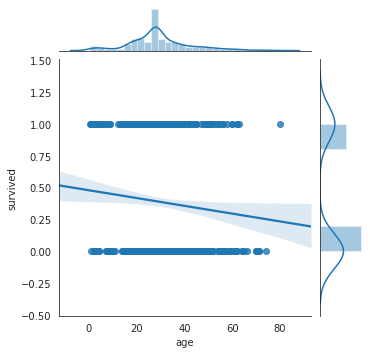

In [68]:
with sns.axes_style('white'):
    j = sns.jointplot("age", "survived", data=train, kind='reg', height=5);
plt.show()

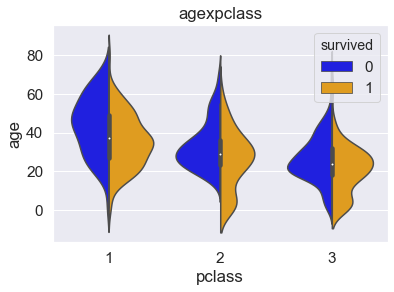

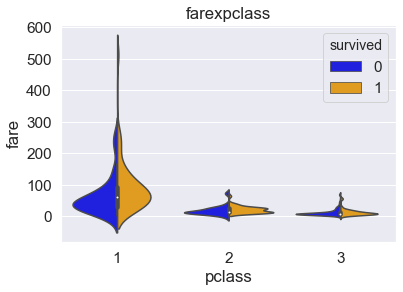

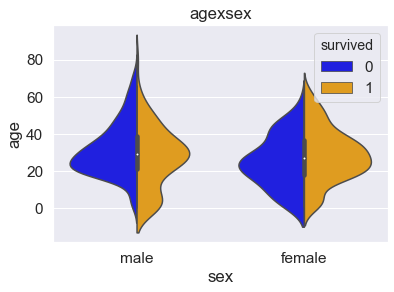

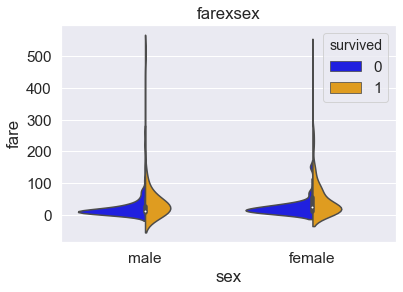

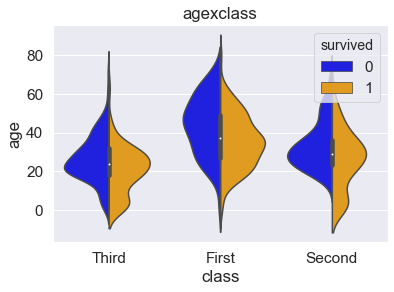

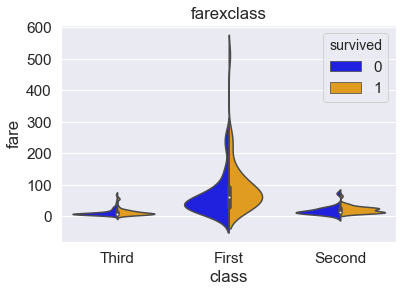

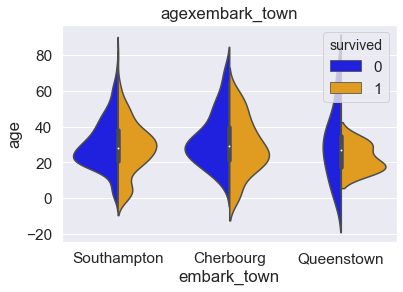

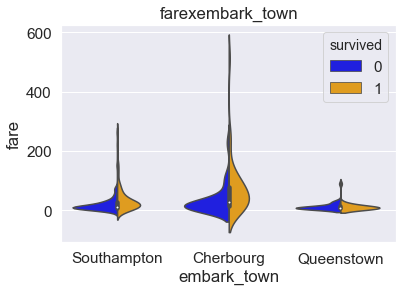

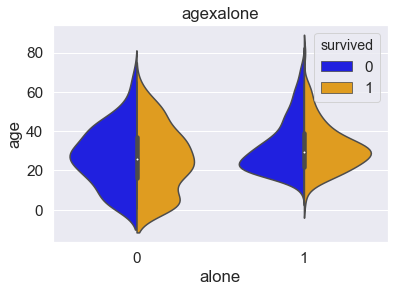

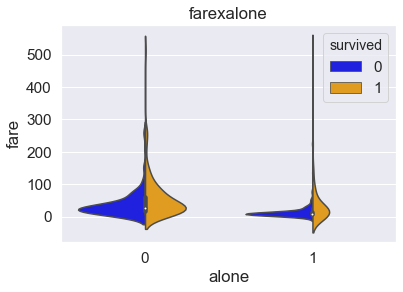

In [84]:


def plot_violin(features, target, df):
    '''
    features = df.drop(columns = "survived").columns
    target = df.survived
    
    '''
    for descrete in df[features].select_dtypes([object,int]).columns.tolist():
        if df[descrete].nunique() <= 5:
            for continous in df[features].select_dtypes(float).columns.tolist():
                sns.violinplot(descrete, continous, hue=target,
                data=df, split=True, palette=['blue','orange'])
                plt.title(continous + 'x' + descrete)
                plt.ylabel(continous)
                plt.show()

plot_violin(features, target, df)

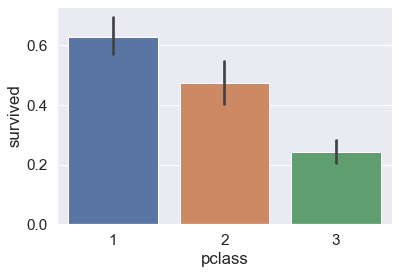

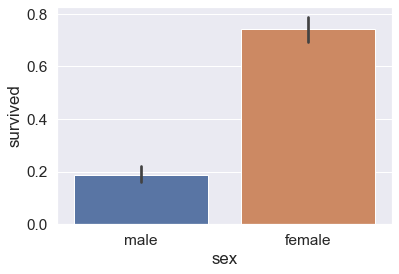

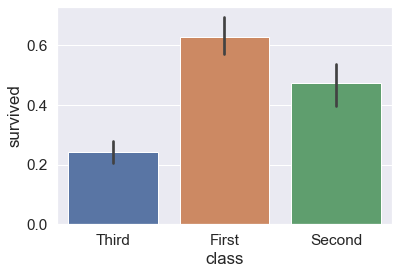

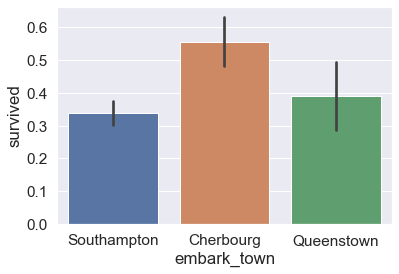

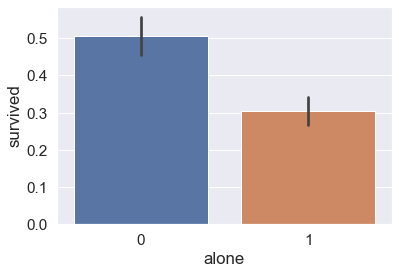

In [88]:


plot_bars(features, target, df)

In [11]:
features = train.select_dtypes(include = "object").columns
features

Index(['sex', 'class', 'embark_town'], dtype='object')

In [12]:
def plot_all_numeric(df, target):
    features = list(df.columns[(df.dtypes == float) | (df.nunique()<5)])
    
    for i, feature in enumerate(features):
        sns.boxplot(feature,target,data=df)
        plt.show()

In [82]:
def loopy_graphs(df, target):
    features = list(df.columns[(df.dtypes == object) | (df.nunique()<5)])
    gs = gridspec.GridSpec(4, 3)
    #_, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,5))
    sns.set(font_scale=1.4)
    pop_rate = df[target].mean()
    for i, feature in enumerate(features):
        ax[i] = plt.subplot(gs[0, i])
        sns.barplot(feature,target,data=df,alpha=.6, ax=ax[i])
        

IndexError: index 3 is out of bounds for axis 1 with size 3

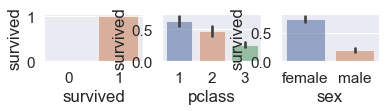

In [83]:
loopy_graphs(train, "survived")

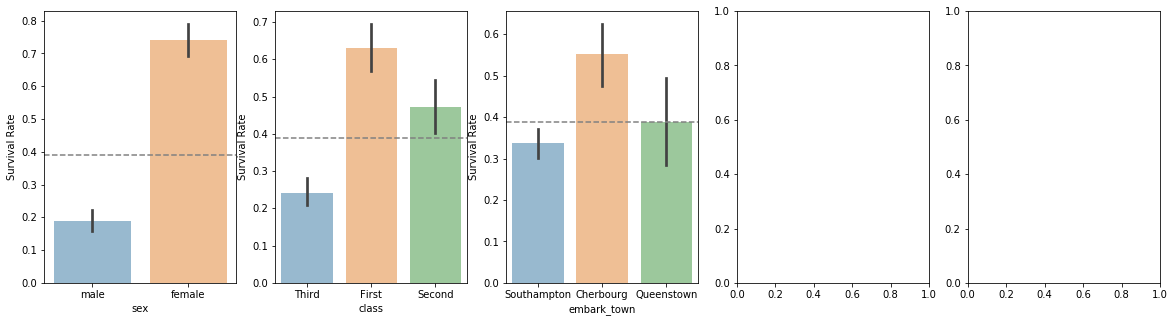

In [65]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

survival_rate = train.survived.mean()
features = train.select_dtypes(object, int).columns
for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')
plt.show()

In [17]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(['taxvaluedollarcnt', 'bathroomcnt', 'bedroomcnt',\
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',\
       'roomcnt', 'unitcnt', 'yearbuilt', 'lotsizesquarefeet']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = numerical[col]  
    plt.subplot(4, 3, plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

NameError: name 'numerical' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(25, 25))
gs = gridspec.GridSpec(4, 3)
sns.set(font_scale=1.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, -1])
ax4 = plt.subplot(gs[1: , :])

sns.violinplot(x="tenure_years", y="total_charges", data=df, ax = ax1)
sns.boxplot(x="tenure_years", y="total_charges", data=df, ax = ax2)
sns.barplot(x="tenure_years", y="total_charges", data=df, ax = ax3)
sns.heatmap(df.corr(),cmap='Blues',annot=True, ax = ax4)
#sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})